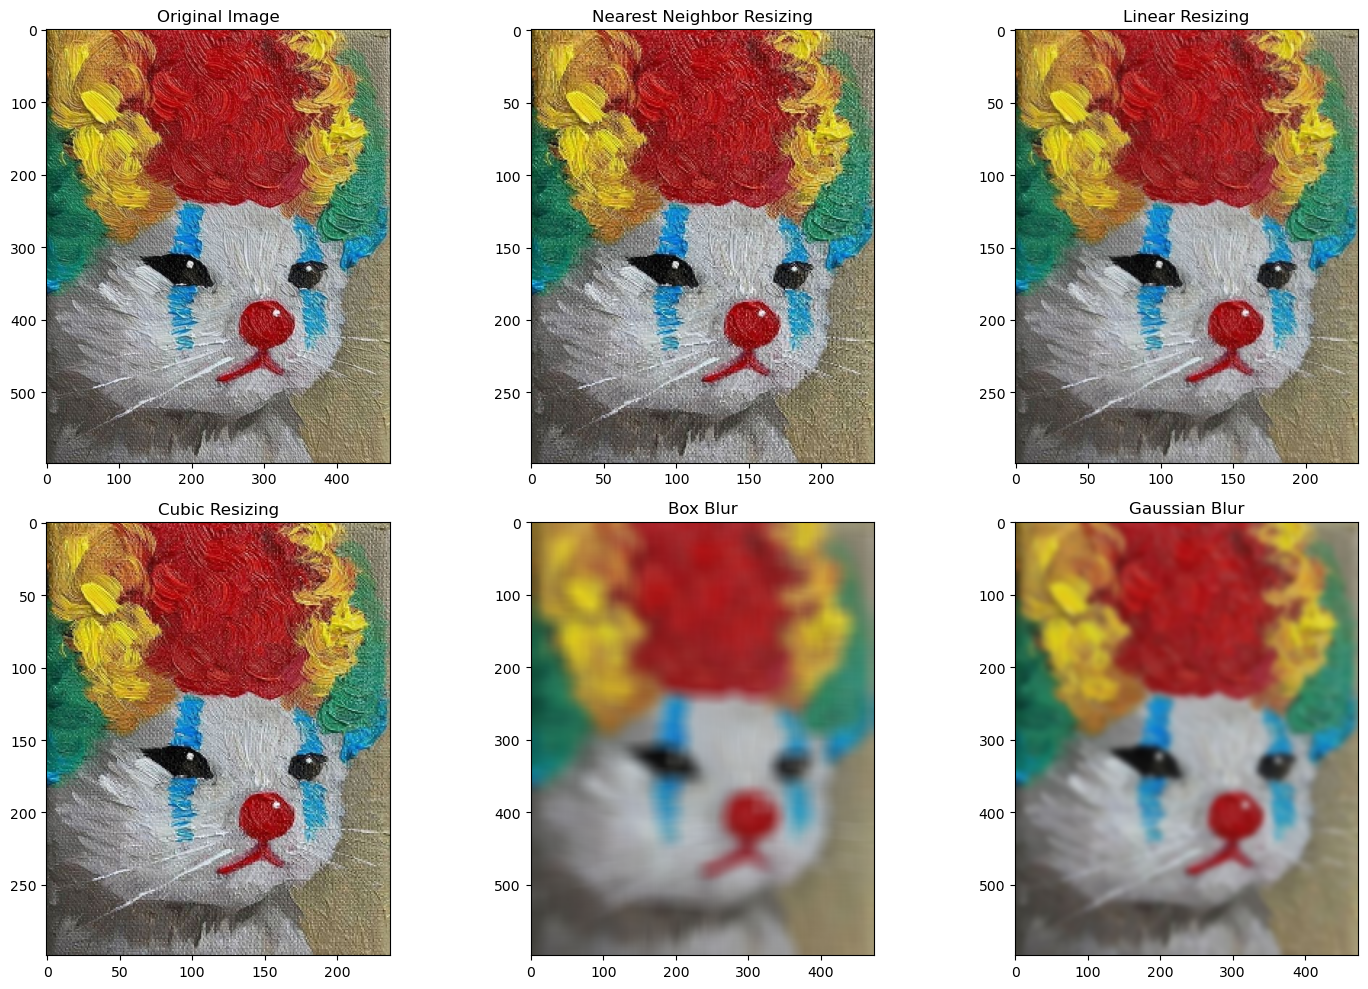

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('clowncat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image Resizing
resized_nearest = cv2.resize(image, None, fx=0.5, fy=0.5, 
                            interpolation=cv2.INTER_NEAREST)
resized_linear = cv2.resize(image, None, fx=0.5, fy=0.5, 
                           interpolation=cv2.INTER_LINEAR)
resized_cubic = cv2.resize(image, None, fx=0.5, fy=0.5, 
                          interpolation=cv2.INTER_CUBIC)

# Image Blurring
box_blur = cv2.boxFilter(image, -1, (25,25))
gaussian_blur = cv2.GaussianBlur(image, (25,25), 0)
median_blur = cv2.medianBlur(image, 25)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(resized_nearest)
plt.title('Nearest Neighbor Resizing')

plt.subplot(2, 3, 3)
plt.imshow(resized_linear)
plt.title('Linear Resizing')

plt.subplot(2, 3, 4)
plt.imshow(resized_cubic)
plt.title('Cubic Resizing')

plt.subplot(2, 3, 5)
plt.imshow(box_blur)
plt.title('Box Blur')

plt.subplot(2, 3, 6)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blur')

plt.tight_layout()
plt.show()


------------------------------
SVM Evaluation
------------------------------
Average CV Accuracy: 0.971
Average CV Precision: 0.972
Average CV Recall: 0.971
Average CV F1-Score: 0.971

Test Set Accuracy: 0.978
Test Set Precision: 0.979
Test Set Recall: 0.978
Test Set F1-Score: 0.979


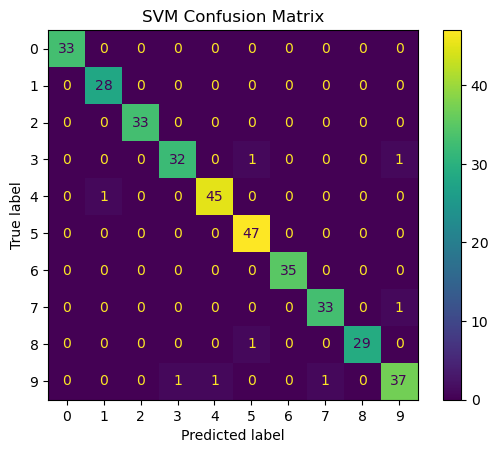

Test Set ROC AUC: 1.000


------------------------------
Random Forest Evaluation
------------------------------
Average CV Accuracy: 0.971
Average CV Precision: 0.973
Average CV Recall: 0.971
Average CV F1-Score: 0.971

Test Set Accuracy: 0.975
Test Set Precision: 0.977
Test Set Recall: 0.974
Test Set F1-Score: 0.975


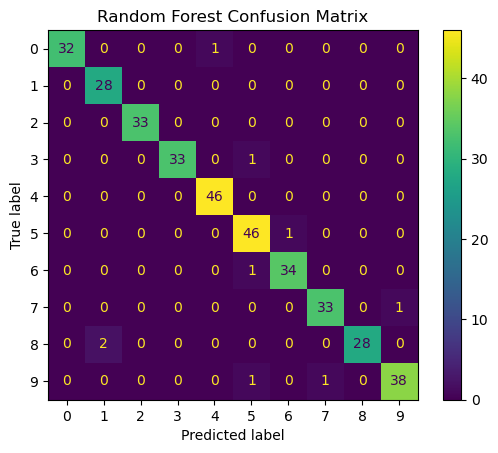

Test Set ROC AUC: 1.000



In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             roc_curve, ConfusionMatrixDisplay)
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)

# Define models
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Define metrics to calculate
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation and evaluation
for name, model in models.items():
    print(f"\n{'-'*30}\n{name} Evaluation\n{'-'*30}")
    
    # Cross-validation
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    
    print(f"Average CV Accuracy: {np.mean(cv_results['test_accuracy']):.3f}")
    print(f"Average CV Precision: {np.mean(cv_results['test_precision_macro']):.3f}")
    print(f"Average CV Recall: {np.mean(cv_results['test_recall_macro']):.3f}")
    print(f"Average CV F1-Score: {np.mean(cv_results['test_f1_macro']):.3f}")
    
    # Final evaluation on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    # Calculate metrics
    print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Test Set Precision: {precision_score(y_test, y_pred, average='macro'):.3f}")
    print(f"Test Set Recall: {recall_score(y_test, y_pred, average='macro'):.3f}")
    print(f"Test Set F1-Score: {f1_score(y_test, y_pred, average='macro'):.3f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    # ROC AUC (One-vs-Rest approach)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    print(f"Test Set ROC AUC: {roc_auc:.3f}\n")